### Analysing the company data to see which attributes are impacting high sales by using DecisionTree ML method


## Import required libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import company data

In [12]:
cd = pd.read_csv('Company_Data.csv')

In [13]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


#### Check the data information which includes data types of all the columns

In [14]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### Check if there are any null values in the dataframe

In [15]:
cd.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

As per above, there are no null values in the dataframe. And could see majority columns are integer type but few are object data types. 
Now describe the dataframe to see distribution of the data accross the columns.



In [16]:
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


#### Sales: Mean and Median is almost same, looks to be normal distribution with slightly right skewed
#### Sales: Could see there are occurances where no sale happend
#### Age: Only persons with age above 25 participated in the sales
#### Education: Only persons with education => 10 participated and highest education is 18

In [17]:
# check the unique values in Sales column
cd['Sales'].nunique()

336

<AxesSubplot:>

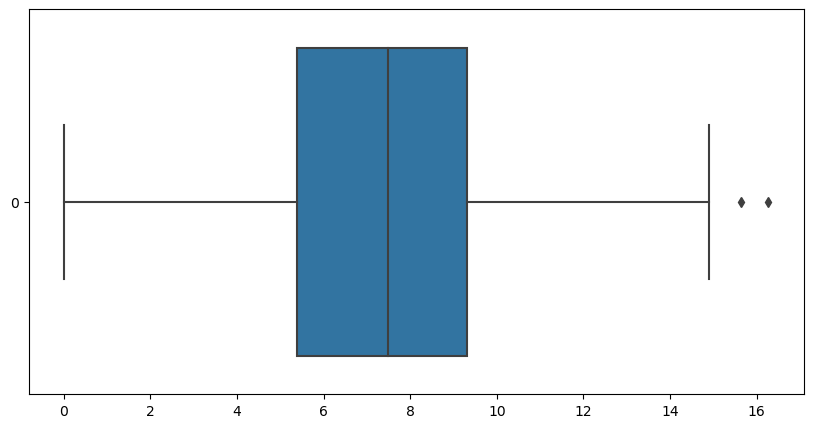

In [18]:
# Check the distribution of the Sales date with the help of boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=cd['Sales'], orient="h")

### We can see most of the Sales data concentrated between 5 to 9 and could see 2 outliers. 

<AxesSubplot:xlabel='Sales', ylabel='Count'>

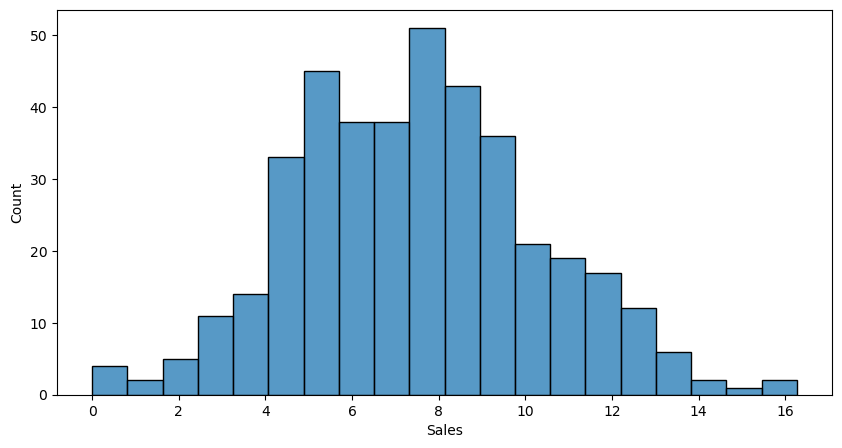

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(data=cd['Sales'], bins=20)

In [20]:
cd.corr().style.background_gradient(cmap='coolwarm')

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


## Not much strong correlation found between the Sales and other columns. And Age & Price having negetive correlation with Sales data.

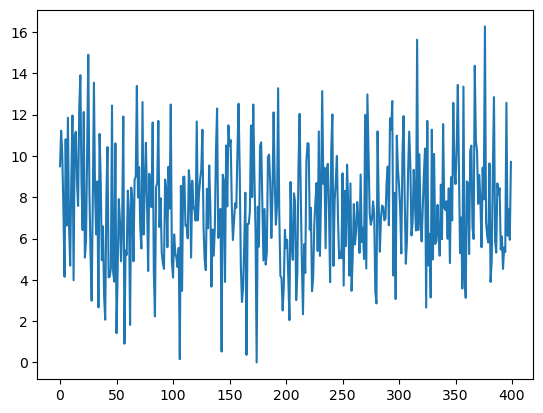

In [21]:
plt.plot(cd.Sales)

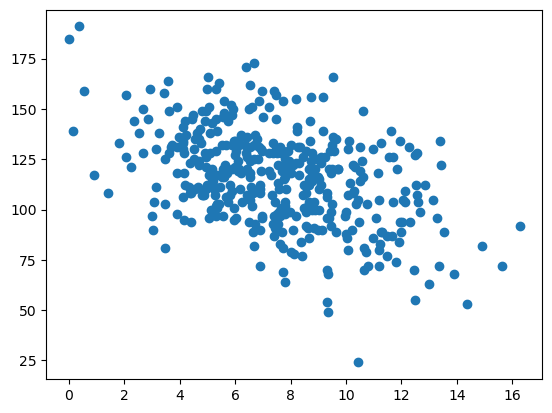

In [22]:
plt.scatter( x = cd['Sales'],y = cd['Price']);

In [23]:
X = cd['Sales'].max()
X

16.27

### Will bucketing the Sales data into 'Low', 'Medium','High'

In [24]:
df = cd.copy()
df['Sales_Category'] = pd.cut(x = df['Sales'], bins = [0,5,8,16.3], labels = ['Low', 'Medium','High'], right = False)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [25]:
df['Sales_Category'].value_counts()

High      164
Medium    159
Low        77
Name: Sales_Category, dtype: int64

<AxesSubplot:xlabel='Sales_Category', ylabel='count'>

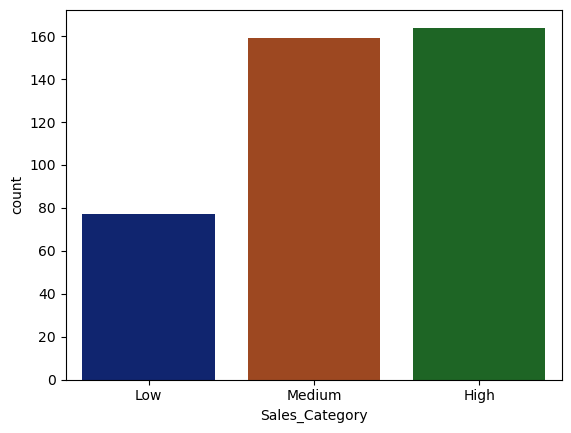

In [26]:
sns.countplot(data=df, x='Sales_Category', palette = "dark")

### Majority falls into Medium and High category

In [27]:
df1 = df.drop('Sales', axis=1)

### Will use get_dummies for the columns in the dataset otherthen Sales column

In [28]:
df1 = pd.get_dummies(df1.iloc[:,:-1])
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [29]:
# Add Sales column also to the dataset
df1['Sales_Category'] = df['Sales_Category']

In [37]:
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_Category
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Medium
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Medium
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Medium


In [30]:
# Will apply the lable encoding for Sales_Category column in the dataset

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(df1["Sales_Category"])
df1['Sales_Category'] = le.transform(df1["Sales_Category"])
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_Category
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,2
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,2
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,2


### Initiate the required libraries to run the Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
# Split the data
X = df1.iloc[:,:-1]
Y = df1.iloc[:,-1:]

In [33]:
df1.shape, X.shape, Y.shape

((400, 15), (400, 14), (400, 1))

In [36]:
# Split the data into Train and Test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7, stratify=Y)

## Run the Decision Tree Classifier with gini method and splitter as 'random'

In [37]:
dt_clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='random')
dt_clf_gini = dt_clf_gini.fit(X_train, Y_train)
Y_pred = dt_clf_gini.predict(X_test)

In [38]:
# Check the accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.553030303030303


In [39]:
# Check the confusion matrix
print(confusion_matrix(Y_test, Y_pred))

[[31  2 21]
 [ 2 11 12]
 [16  6 31]]


In [40]:
# Check the precision, recall and F1-score
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        54
           1       0.58      0.44      0.50        25
           2       0.48      0.58      0.53        53

    accuracy                           0.55       132
   macro avg       0.57      0.53      0.54       132
weighted avg       0.56      0.55      0.55       132



## Run the Decision Tree Classifier with entropy method and splitter as 'random'


In [41]:
dt_clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='random')
dt_clf_entropy = dt_clf_entropy.fit(X_train, Y_train)
Y_pred2 = dt_clf_entropy.predict(X_test)

In [42]:
# Check the accuracy

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred2))

Accuracy: 0.5984848484848485


In [43]:
# Check the confusion matrix

print(confusion_matrix(Y_test, Y_pred2))

[[30  3 21]
 [ 2 11 12]
 [ 8  7 38]]


In [44]:
# Check the precision, recall and F1-score

print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        54
           1       0.52      0.44      0.48        25
           2       0.54      0.72      0.61        53

    accuracy                           0.60       132
   macro avg       0.60      0.57      0.58       132
weighted avg       0.62      0.60      0.60       132



In [46]:
pip install six

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


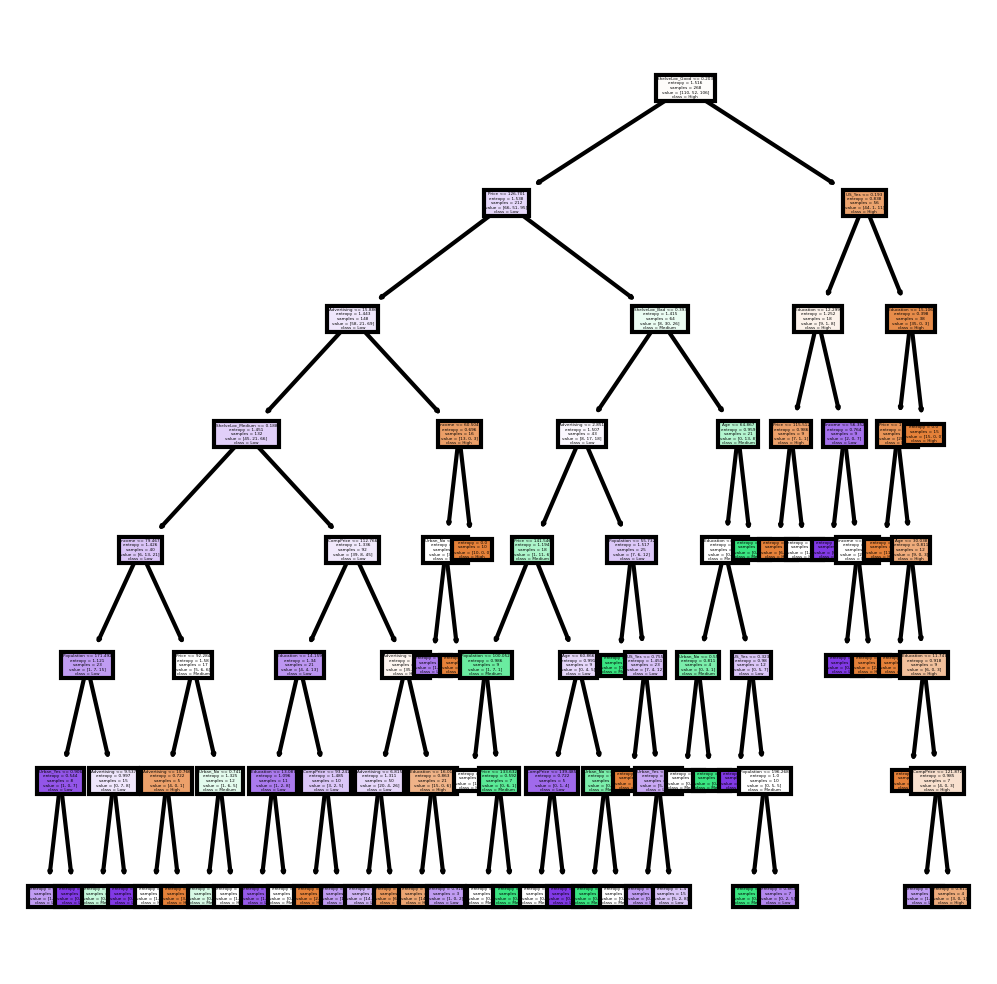

In [45]:
# Check the Decision Tree with the help of image

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn = list(X_train)
cn = ['High', 'Medium', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dt_clf_entropy,feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

####  Pruning the tree is important to reduce overfitting

In [46]:
dt_clf_entropy2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1)
dt_clf_entropy2.fit(X_train, Y_train)
print(dt_clf_entropy2.score(X_train, Y_train))
print(dt_clf_entropy2.score(X_test, Y_test))

0.6567164179104478
0.553030303030303


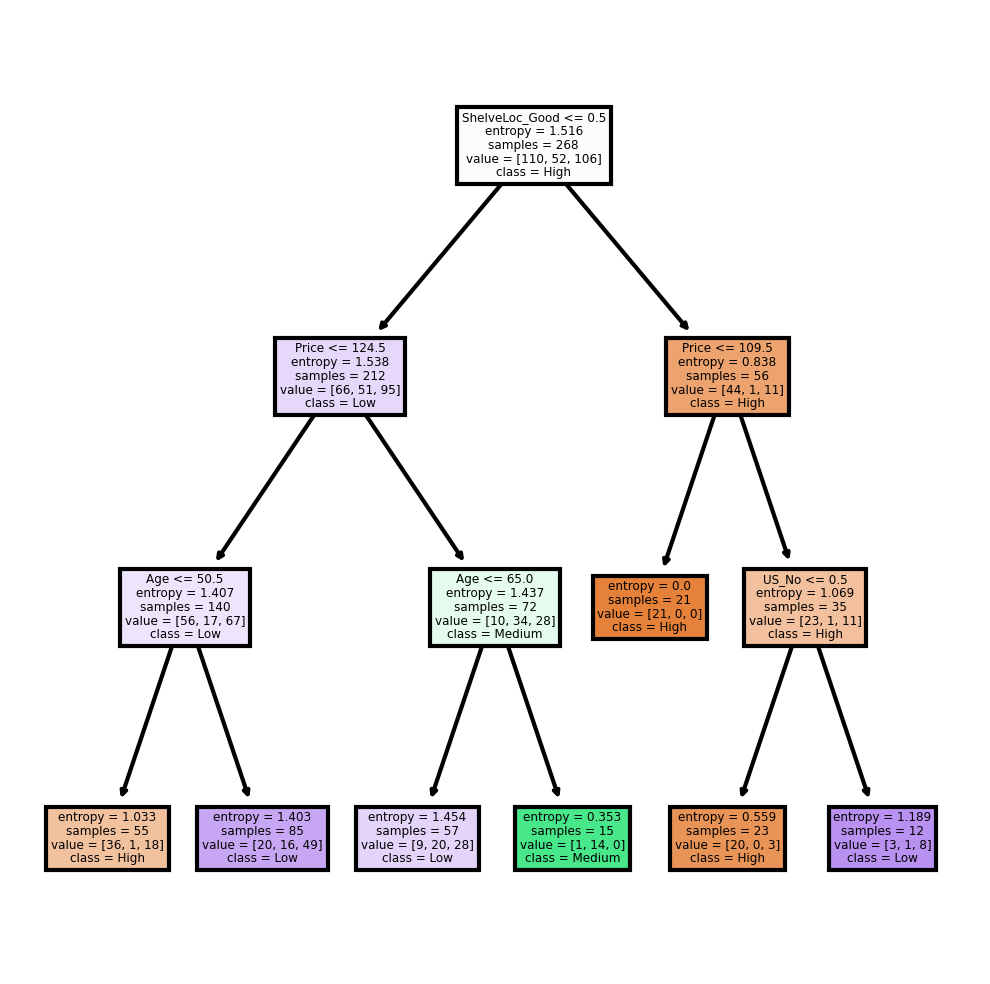

In [54]:
fn = list(X_train)
cn = ['High', 'Medium', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dt_clf_entropy2,feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [50]:
print (pd.DataFrame(dt_clf_entropy.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
CompPrice         0.123635
Income            0.051969
Advertising       0.078767
Population        0.063758
Price             0.194279
Age               0.104998
Education         0.075914
ShelveLoc_Bad     0.000000
ShelveLoc_Good    0.125406
ShelveLoc_Medium  0.061472
Urban_No          0.041382
Urban_Yes         0.021499
US_No             0.034943
US_Yes            0.021978


### Based on the above, Price and Age are more impacting factors on the Sales happend. 